In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Atlantic Hurricane data

In [2]:
df = pd.read_csv('/Users/danielbrechner/hurrdat_co2/assets/atlantic.csv')
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


The naming convention was applied to hurricanes starting in 1950. This might indicate better data quality, so we will use hurricane data from 1950 to the most recent year in the dataset

In [3]:
#boolean indexing to df
hurricanes = df[df['Date'] >= 19500000]
hurricanes.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
21879,AL011950,ABLE,19500812,0,,TS,17.1N,55.5W,35,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21880,AL011950,ABLE,19500812,600,,TS,17.7N,56.3W,40,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21881,AL011950,ABLE,19500812,1200,,TS,18.2N,57.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21882,AL011950,ABLE,19500812,1800,,TS,19.0N,58.6W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
21883,AL011950,ABLE,19500813,0,,TS,20.0N,60.0W,50,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


Dropping unnecessary columns

In [4]:
hurricanes = hurricanes.drop(columns=['ID', 'Time', 'Event', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], axis = 1,)


In [5]:
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
21879,ABLE,19500812,TS,17.1N,55.5W,35,-999
21880,ABLE,19500812,TS,17.7N,56.3W,40,-999
21881,ABLE,19500812,TS,18.2N,57.4W,45,-999
21882,ABLE,19500812,TS,19.0N,58.6W,50,-999
21883,ABLE,19500813,TS,20.0N,60.0W,50,-999


In [6]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27226 entries, 21879 to 49104
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              27226 non-null  object
 1   Date              27226 non-null  int64 
 2   Status            27226 non-null  object
 3   Latitude          27226 non-null  object
 4   Longitude         27226 non-null  object
 5   Maximum Wind      27226 non-null  int64 
 6   Minimum Pressure  27226 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.7+ MB


Converting to datetime 

In [7]:
hurricanes.loc[:, 'Date'] = pd.to_datetime(hurricanes['Date'], format='%Y-%m-%d').dt.date

In [8]:
hurricanes.dtypes

Name                object
Date                object
Status              object
Latitude            object
Longitude           object
Maximum Wind         int64
Minimum Pressure     int64
dtype: object

In [10]:
#The Date column is still showing up as an object because '.dt.date' returns an object, not a pandas datetime object. So we must run 'pd.to_datetime' again

hurricanes['Date'] = pd.to_datetime(hurricanes['Date'])
hurricanes.dtypes


Name                        object
Date                datetime64[ns]
Status                      object
Latitude                    object
Longitude                   object
Maximum Wind                 int64
Minimum Pressure             int64
dtype: object

No null values are found but negative values such as -999 for wind represents null. Lets drop these values from the dataset and convert to NaN.

In [11]:
cols_to_check = ['Maximum Wind', 'Minimum Pressure']
negative_mask = (hurricanes[cols_to_check] < 0)
hurricanes[cols_to_check] = hurricanes[cols_to_check].mask(negative_mask, np.nan)


In [12]:
negative_exist = ((hurricanes['Maximum Wind'] < 0) | (hurricanes['Minimum Pressure'] < 0)).any()
print("The number of negative values in the Maximum Wind and Minimum Pressure columns are:", negative_exist.sum())

The number of negative values in the Maximum Wind and Minimum Pressure columns are: 0


Creating a new column for years and months

In [13]:
hurricanes['Year'] = hurricanes['Date'].dt.year
hurricanes['Month'] = hurricanes['Date'].dt.month
hurricanes.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month
21879,ABLE,1970-01-01,TS,17.1N,55.5W,35.0,NaN,1970,1
21880,ABLE,1970-01-01,TS,17.7N,56.3W,40.0,NaN,1970,1
21881,ABLE,1970-01-01,TS,18.2N,57.4W,45.0,NaN,1970,1
21882,ABLE,1970-01-01,TS,19.0N,58.6W,50.0,NaN,1970,1
21883,ABLE,1970-01-01,TS,20.0N,60.0W,50.0,NaN,1970,1


In [23]:
print(hurricanes['Year'].unique())

[1970]


In [21]:
max_wind_speeds = hurricanes.loc[hurricanes.groupby('Name')['Maximum Wind'].idxmax(), ['Name', 'Maximum Wind', 'Year', 'Month']]
max_wind_speeds


,Name,Maximum Wind,Year,Month
31610,AMY,60.0,1970,1
35322,ANA,60.0,1970,1
37712,BOB,100.0,1970,1
22074,DOG,125.0,1970,1
46971,DON,45.0,1970,1
...,...,...,...,...
28964,FRANCELIA,100.0,1970,1
36987,GABRIELLE,125.0,1970,1
35158,JOSEPHINE,90.0,1970,1
39369,SEBASTIEN,55.0,1970,1


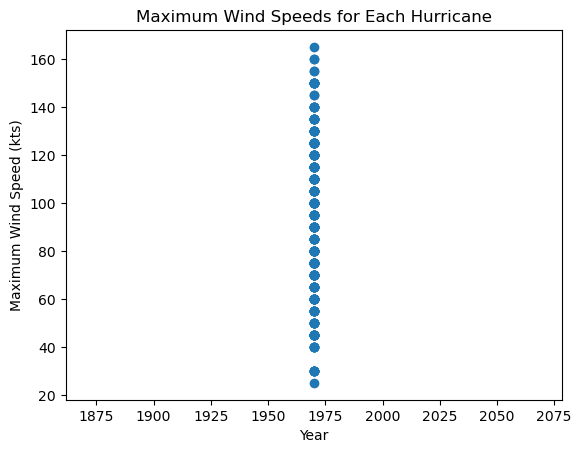

In [22]:
# trying to plot the maximum wind speeds for each hurricane
plt.plot(max_wind_speeds['Year'], max_wind_speeds['Maximum Wind'], 'o')
plt.xlabel('Year')
plt.ylabel('Maximum Wind Speed (kts)')
plt.title('Maximum Wind Speeds for Each Hurricane')
plt.show()